In [1]:
import pandas as pd

/var/folders/hk/p7fcnhm10z92trzs_9kwqlyr0000gn/T/ipykernel_30406/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('chicago_crime_dataset_v2.csv')
# data = data[data.Year=='2021']

In [4]:
data_2021 = data[data.Year==2021]

1. Crime amount trend monthly
2. Crime type amount, also FBI Code
3. Crime blocks amount
4. blocks & types
5. Arrest 严重程度
6. Domestic 人口
7. Beat, District, Community Area are a type of area

In [5]:
data_2021.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
265,12571973,JE482457,12/19/2021 07:23:00 AM,042XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,True,921,9.0,15.0,58.0,08B,1158067.0,1876425.0,2021,09/12/2022 04:45:45 PM,41.816657,-87.695689,"(41.81665685, -87.695688608)",49.0,22248.0,55.0,156.0,3.0,56.0,23.0,110.0
59361,12343475,JE202728,04/16/2021 08:45:00 PM,056XX N RIDGE AVE,0820,THEFT,$500 AND UNDER,OTHER (SPECIFY),False,False,2013,20.0,48.0,77.0,06,NaN,NaN,2021,04/23/2021 04:51:47 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63538,12602803,JF125633,10/21/2021 11:00:00 AM,083XX S STONY ISLAND AVE,500E,OTHER OFFENSE,EAVESDROPPING,OTHER (SPECIFY),False,False,412,4.0,8.0,45.0,26,1188260.0,1849805.0,2021,02/27/2022 03:46:31 PM,41.742941,-87.585783,"(41.74294124, -87.585783412)",9.0,21202.0,41.0,133.0,35.0,61.0,19.0,240.0
69374,12540388,JE444591,11/14/2021 06:00:00 AM,086XX S COTTAGE GROVE AVE,0850,THEFT,ATTEMPT THEFT,CONVENIENCE STORE,False,False,632,6.0,6.0,44.0,06,1183071.0,1847869.0,2021,11/21/2021 03:48:03 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",31.0,21546.0,40.0,140.0,32.0,61.0,20.0,241.0
69765,12541139,JE445494,11/14/2021 04:00:00 AM,034XX W 38TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,911,9.0,12.0,58.0,08B,1154073.0,1879187.0,2021,11/21/2021 03:48:03 PM,41.824317,-87.710266,"(41.824316537, -87.710266215)",29.0,22248.0,55.0,612.0,1.0,56.0,23.0,96.0


In [38]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208001 entries, 265 to 7691198
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          208001 non-null  int64  
 1   Case Number                 208001 non-null  object 
 2   Date                        208001 non-null  object 
 3   Block                       208001 non-null  object 
 4   IUCR                        208001 non-null  object 
 5   Primary Type                208001 non-null  object 
 6   Description                 208001 non-null  object 
 7   Location Description        207150 non-null  object 
 8   Arrest                      208001 non-null  bool   
 9   Domestic                    208001 non-null  bool   
 10  Beat                        208001 non-null  int64  
 11  District                    208001 non-null  float64
 12  Ward                        207990 non-null  float64
 13  Community Area  

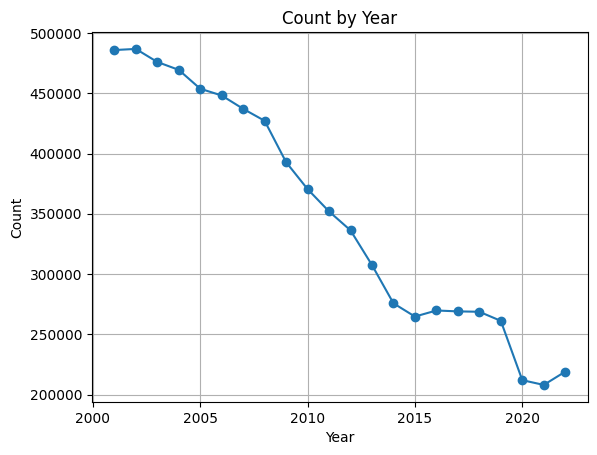

In [8]:
# 按年份进行分组，并计算每个年份的数量
grouped = data.groupby('Year').size()

# 绘制折线图
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count by Year')
plt.grid(True)
plt.show()

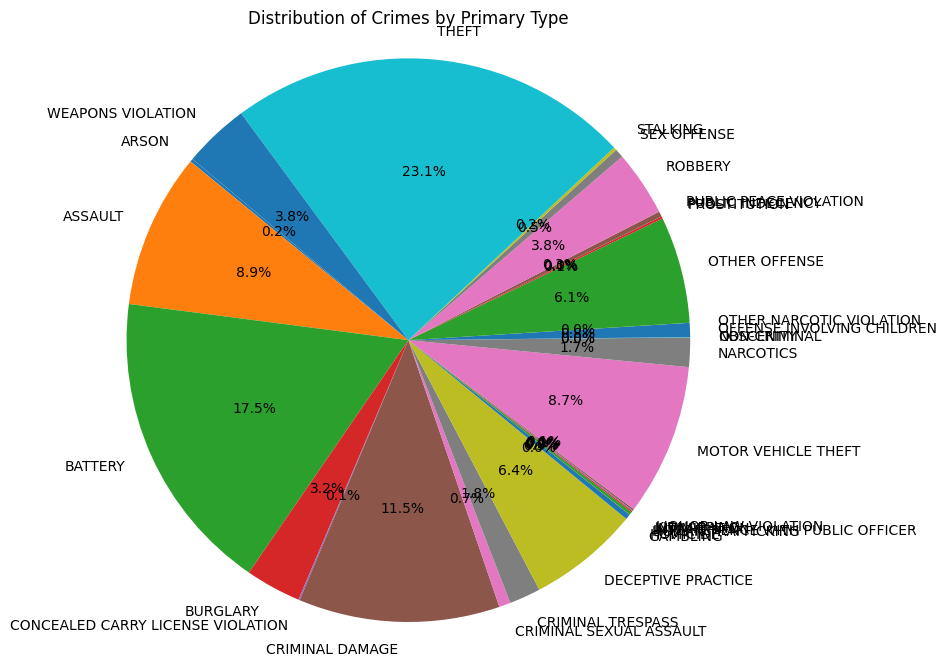

In [35]:
# 按'Primary Type'进行分组，并计算每个组的大小
grouped = data[data.Year==2022].groupby('Primary Type').size()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 保持圆形
plt.title('Distribution of Crimes by Primary Type')
plt.show()

TOP_5 = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSULT', 'MOTOR VEHICLE THEFT']

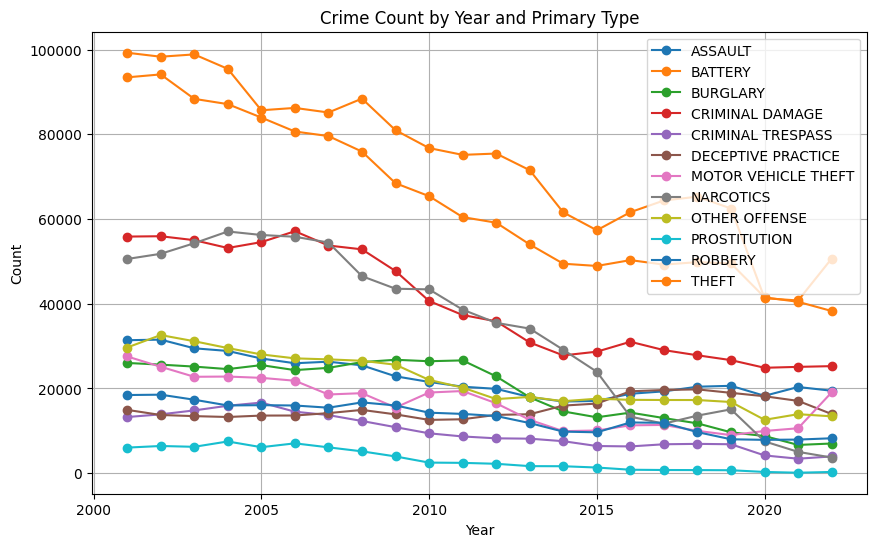

In [34]:
# 按照'Year'和'Primary Type'进行分组，并计算每个组的数量
grouped = data.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in grouped.columns:
    if grouped[primary_type].values[0] < 5000:
        continue
    plt.plot(grouped.index, grouped[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Crime Count by Year and Primary Type')
plt.legend()
plt.grid(True)
plt.show()

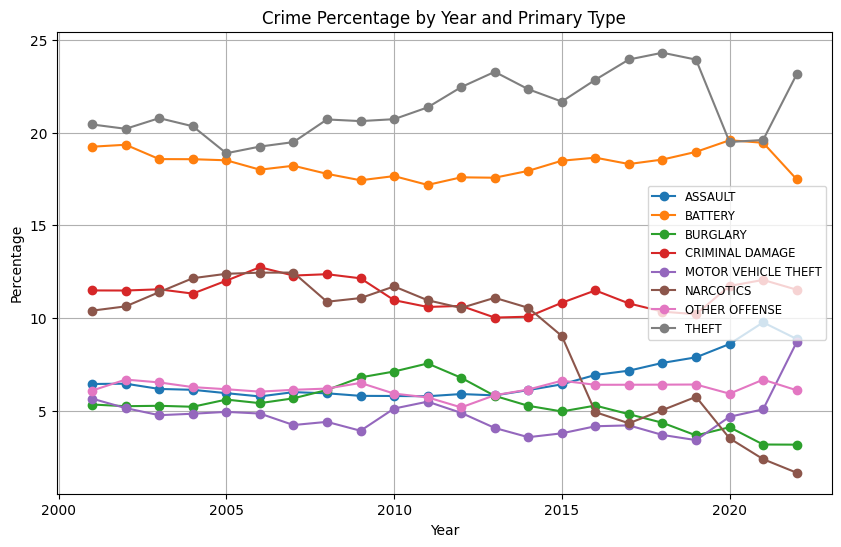

In [23]:
# 按照'Year'和'Primary Type'进行分组，并计算每个组的数量
grouped = data.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    if percentages[primary_type].values[0] < 5:
        continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Primary Type')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

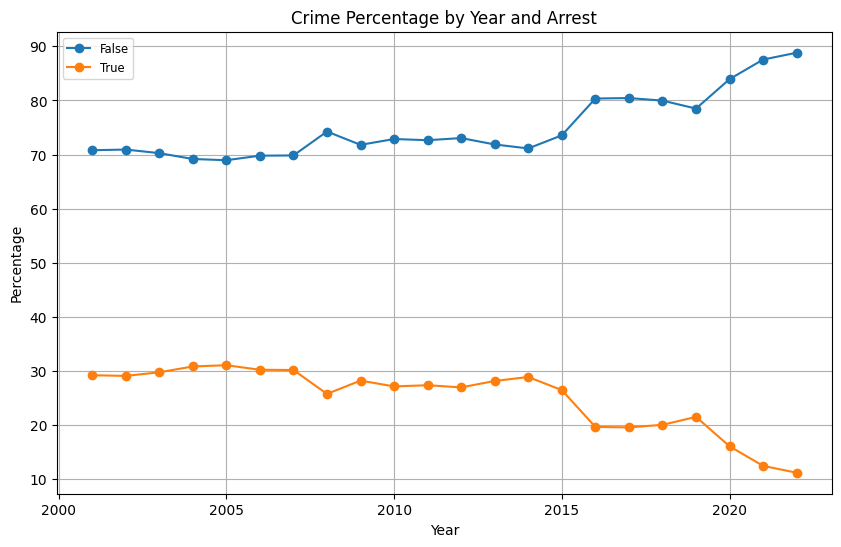

In [24]:
# 按照'Year'和'Arrest'进行分组，并计算每个组的数量
grouped = data.groupby(['Year', 'Arrest']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    # if percentages[primary_type].values[0] < 5:
    #     continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Arrest')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

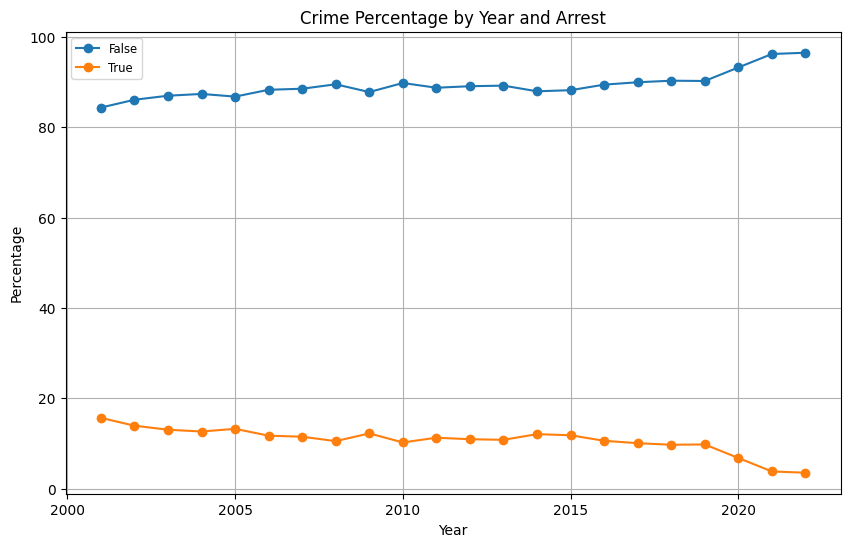

In [36]:
# 按照'Year'和'Arrest'进行分组，并计算每个组的数量
grouped = data[data['Primary Type']=='THEFT'].groupby(['Year', 'Arrest']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    # if percentages[primary_type].values[0] < 5:
    #     continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Crime Percentage by Year and Arrest')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

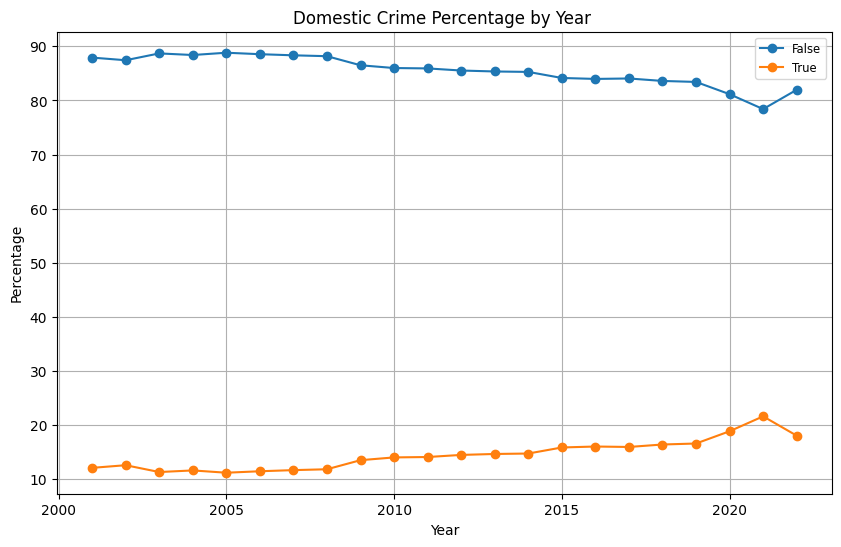

In [11]:
# 按照'Year'和'Domestic'进行分组，并计算每个组的数量
grouped = data.groupby(['Year', 'Domestic']).size().unstack(fill_value=0)

# 计算每个主要类型在每年的占比
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# 绘制折线图
plt.figure(figsize=(10, 6))
for primary_type in percentages.columns:
    # if percentages[primary_type].values[0] < 5:
    #     continue
    plt.plot(percentages.index, percentages[primary_type], label=primary_type, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Domestic Crime Percentage by Year ')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()

In [40]:
import geopandas as gpd

df = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# 加载芝加哥地图数据
chicago_map = gpd.read_file(gpd.datasets.get_path('chi'))

# 绘制地图和数据
fig, ax = plt.subplots(figsize=(10, 10))
chicago_map.plot(ax=ax, color='lightgray')
df.plot(ax=ax, color='red', marker='o', markersize=50)
plt.title('Chicago Map with Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

ValueError: The dataset 'chi' is not available. Available datasets are naturalearth_cities, naturalearth_lowres, nybb

In [5]:
import folium

# 创建一个地图中心为芝加哥市中心的folium地图
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# 在地图上添加标记
for index, row in data[data.Year==2022].sample(1000).iterrows():
    if pd.notna(row['Latitude']):
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Description']).add_to(chicago_map)

# 显示地图
chicago_map

In [12]:
import folium
from folium.plugins import HeatMap

# 创建一个地图中心为芝加哥市中心的folium地图
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10)

# 获取数据并过滤掉经纬度为空的数据
filtered_data = data[data['Latitude'].notnull()]

# 提取经纬度数据
locations = filtered_data[['Latitude', 'Longitude']][filtered_data.Year==2022].sample(2000)

# 将经纬度数据转换为列表格式
location_list = locations.values.tolist()

# 创建热度图层
heat_map = HeatMap(location_list, radius=15, blur=25)

# 添加热度图层到地图上
chicago_map.add_child(heat_map)

# 显示地图
chicago_map

categorical:
    when: month, day, hour
    where: street, Beat, district
    what: crime type, fbi code(need to check reference website)
    who: domestic or not
quantative:
    crime amount
    arrest amount
